In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('../data/Traffic_Collision_Data_from_2010_to_Present.csv', delimiter=',')

In [42]:
# Location, Date reported, date occurred, area name, premise desc

# Victim age, sex, descent for biased analysis
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190211527,05/18/2019,05/18/2019,110,2,Rampart,279,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,33.0,F,H,101.0,STREET,UNION,JAMES M WOOD,"(34.0508, -118.2731)"
1,110518459,10/11/2011,10/11/2011,1735,5,Harbor,505,997,TRAFFIC COLLISION,0506,27.0,F,O,101.0,STREET,VERMONT,KNOX,"(33.8542, -118.2905)"
2,180618348,08/09/2018,08/09/2018,1830,6,Hollywood,665,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4006,33.0,M,W,101.0,STREET,FRANKLIN AV,ARGYLE,"(34.1052, -118.3252)"
3,120312271,05/09/2012,05/09/2012,845,3,Southwest,331,997,TRAFFIC COLLISION,NaN,51.0,M,B,101.0,STREET,LA BREA AV,JEFFERSON BL,"(34.0255, -118.3548)"
4,121215287,06/13/2012,06/13/2012,745,12,77th Street,1208,997,TRAFFIC COLLISION,0605,48.0,F,B,101.0,STREET,48TH ST,FIGUEROA,"(33.9997, -118.2827)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519650,192009655,04/24/2019,04/24/2019,925,20,Olympic,2036,997,TRAFFIC COLLISION,3006 3028 3034 3036 3101 3401 3701 4020 3002,18.0,NaN,NaN,101.0,STREET,VERMONT AV,7TH ST,"(34.0598, -118.2916)"
519651,192010370,05/07/2019,05/07/2019,1845,20,Olympic,2011,997,TRAFFIC COLLISION,3004 3026 3029 3035 3037 3101 3401 3701 4020,52.0,M,O,101.0,STREET,GRAMERCY PL,3RD ST,"(34.069, -118.3128)"
519652,192109718,05/07/2019,05/06/2019,2300,21,Topanga,2106,997,TRAFFIC COLLISION,3037 3006 4009 3028 3030 3101 3401 3701,39.0,M,X,101.0,STREET,PARTHENIA ST,ETON AV,"(34.2282, -118.5951)"
519653,192107531,03/21/2019,03/17/2019,1600,21,Topanga,2156,997,TRAFFIC COLLISION,3003 3037 3029 3026 3101 3401 3701 4026,26.0,F,O,101.0,STREET,OWENSMOUTH AV,VICTORY BL,"(34.1878, -118.6015)"


In [31]:
# Biased analysis
biased_analysis = {
    'area_name':df['Area Name'],
    'crime_code':df['Crime Code'],
    'victim_age':df['Victim Age'],
    'victim_sex':df['Victim Sex'],
    'victim_race':df['Victim Descent']
}
df_biased = pd.DataFrame(biased_analysis)

In [37]:
# Parse coordinates into distinct variables
str_coord = []
for i in range(len(df['Location'])):
    temp_str = df['Location'][i].replace('(', '').replace(')', '').replace(',', '').split(' ')
    temp_coord = [float(x) for x in temp_str]
    str_coord.append(temp_coord)
    
lon = [x[0] for x in str_coord]
lat = [x[1] for x in str_coord]

f = {
    'date_occur':df['Date Occurred'],
    'time_occur':df['Time Occurred'],
    'longitude':lon, 
    'latitude':lat
    }
data = pd.DataFrame(f)

In [38]:
data

,date_occur,time_occur,longitude,latitude
0,05/18/2019,110,34.0508,-118.2731
1,10/11/2011,1735,33.8542,-118.2905
2,08/09/2018,1830,34.1052,-118.3252
3,05/09/2012,845,34.0255,-118.3548
4,06/13/2012,745,33.9997,-118.2827
...,...,...,...,...
519650,04/24/2019,925,34.0598,-118.2916
519651,05/07/2019,1845,34.0690,-118.3128
519652,05/06/2019,2300,34.2282,-118.5951
519653,03/17/2019,1600,34.1878,-118.6015


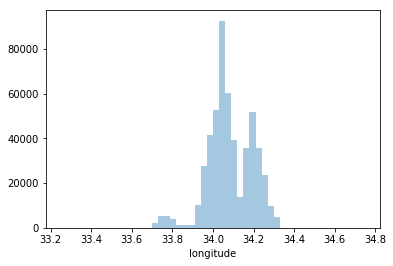

In [39]:
import seaborn as sns
sns.distplot(data['longitude'], kde=False, hist=True, hist_kws={"range": [33.25,34.75]})

In [45]:
result = []

for i in range(len(str_coord)):
    result.append({
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": str_coord[i]
      },
      "properties": {
        "id": df['DR Number'],
        "Date Reported": df['Date Reported'],
        "Date Occurred": df['Date Occurred']
        }
    })

In [50]:
full_json = {
"type": "FeatureCollection",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": result
}